**20164245 Hong Jin**

[K-means clustering on the spatial domain]

Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.

The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm square and L1-norm.

Visualize the result using color coding scheme that distinguishes different clusters.

Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.


# Initial array

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics

height = 70
width = 70

im_array = np.zeros((height, width), dtype = float)
x = np.zeros((height, width), dtype = int)
y = np.zeros((height, width), dtype = int)

for i in range(height):
    for j in range(width):
        x[i][j] = i
        y[i][j] = j

im_label1 = np.zeros((height, width), dtype = int)
im_label2 = np.zeros((height, width), dtype = int)


E1 = []
E2 = []

# Nomalization

In [2]:
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))
    
    return(data_normalized)

# Compute distance based on L2-norm (x, y)

$$||x-y||_{2} = \sqrt{x^2 + y^2} $$

In [3]:
def distance(x,y):
    d = (x - y) ** 2
    s = np.sum(d)
    
    return s

# Compute distance based on L1-norm (x, y)

In [4]:
def L1_distance(x,y):
    d = np.abs(x-y)
    s = np.sum(d)
    
    return s

# Initialize Label

initialize all images with random label

In [5]:
def initialLabel(cluster_num):
    for i in range(height):
        for j in range(width):
            initial_num = random.randrange(0, cluster_num)
            im_label1[i][j] = initial_num
            im_label2[i][j] = initial_num
    
    return im_label1, im_label2

# Initialize Centroid

In [6]:
def initialCentroid(im_average_x, im_average_y, cluster_num, im_label, im_count):
    for i in range(height):
        for j in range(width):
            im_average_x[im_label[i,j]] += x[i][j]
            im_average_y[im_label[i,j]] += y[i][j]
            im_count[im_label[i,j]] += 1
    
    for i in range(cluster_num):
        im_average_x[i] /= im_count[i]
        im_average_y[i] /= im_count[i]
    
    return im_average_x, im_average_y, im_count

# Plot the Final Image

In [7]:
def plot_average(im_label1, im_label2, cluster_num, x1, y1, x2, y2, iter_num):
    
    plt.subplot(121)
    plt.title("L1-norm Image" + str(iter_num))
    plt.imshow(im_label1)
    for i in range(cluster_num):
        plt.plot(y1[i], x1[i],'r')
        plt.plot([y1[i][(len(y1[i])-1)]], [x1[i][(len(x1[i])-1)]],'*r')
    plt.axis('off')
    
    plt.subplot(122)
    plt.title("L2-norm square Image" + str(iter_num))
    plt.imshow(im_label2)
    for i in range(cluster_num):
        plt.plot(y2[i], x2[i],'r')
        plt.plot([y2[i][(len(y2[i])-1)]], [x2[i][(len(x2[i])-1)]],'*r')
    plt.axis('off')
    plt.show()

# Clustering

In [8]:
def clustering(im_label1, im_label2, cluster_num, im_average_x1, im_average_y1,im_average_x2, im_average_y2):
    dist1 = []
    dist2 = []
    for i in range(height):
        for j in range(width): 
            dist1.clear()
            dist2.clear()
            for k in range(cluster_num): 
                nx = x[i][j]
                ny = y[i][j]
                cx1 = im_average_x1[k]
                cy1 = im_average_y1[k]
                cx2 = im_average_x2[k]
                cy2 = im_average_y2[k]
                dist2.append(distance(nx, cx2) + distance(ny, cy2))
                dist1.append(L1_distance(nx, cx1) + L1_distance(ny, cy1))
            im_label2[i][j] = np.argmin(dist2)
            im_label1[i][j] = np.argmin(dist1)
    
    return im_label1, im_label2

# Compute Centroid

In [9]:
def computeCentroid(cluster_num, im_label1, im_label2):
    label_x = []
    label_y = []
    num1 = np.zeros(cluster_num, dtype = int)
    num2 = np.zeros(cluster_num, dtype = int)
    cx1 = np.zeros(cluster_num, dtype = float)
    cy1 = np.zeros(cluster_num, dtype = float)
    cx2 = np.zeros(cluster_num, dtype = float)
    cy2 = np.zeros(cluster_num, dtype = float)
    
    for k in range(cluster_num):
        label_x.append([])
        label_y.append([])
    
    for i in range(height):
        for j in range(width):
            cx2[im_label2[i][j]] += x[i][j]
            cy2[im_label2[i][j]] += y[i][j]
            num2[im_label2[i][j]] += 1 
            label_x[im_label1[i][j]].append(x[i][j])
            label_y[im_label1[i][j]].append(y[i][j])
            num1[im_label1[i][j]] += 1
            
    for k in range(cluster_num):
        if num2[k] != 0:
            cx2[k] /= num2[k]
            cy2[k] /= num2[k]
            
        if num1[k] != 0:
            cx1[k] = statistics.median(label_x[k])
            cy1[k] = statistics.median(label_y[k])
        
    return cx1, cy1, cx2, cy2

# Compute Energy

$E=\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

In [10]:
def computeEnergy(im_label1,im_label2, cluster_num, im_average_x1, im_average_y1, im_average_x2, im_average_y2):
    total_sum1 = 0
    total_sum2 = 0
    num = 0
    for i in range(height):
        for j in range(width):
            total_sum1 += distance(x[i][j], im_average_x1[im_label1[i][j]])
            total_sum1 += distance(y[i][j], im_average_y1[im_label1[i][j]])
            total_sum2 += distance(x[i][j], im_average_x2[im_label2[i][j]])
            total_sum2 += distance(y[i][j], im_average_y2[im_label2[i][j]])
            num += 1
    
    total_sum1 /= num
    total_sum2 /= num
    return total_sum1, total_sum2

# Initialize Cluster

In [11]:
def initialCluster(cluster_num):
    im_average_x1 = np.zeros(cluster_num, dtype=float)
    im_average_y1 = np.zeros(cluster_num, dtype=float)
    im_count1 = np.zeros(cluster_num, dtype=int)
    
    im_average_x2 = np.zeros(cluster_num, dtype=float)
    im_average_y2 = np.zeros(cluster_num, dtype=float)
    im_count2 = np.zeros(cluster_num, dtype=int)

    im_label1, im_label2 = initialLabel(cluster_num)

    im_average_x1, im_average_y1, im_count1 = initialCentroid(im_average_x1, im_average_y1, cluster_num, im_label1, im_count1)
    im_average_x2, im_average_y2, im_count2 = initialCentroid(im_average_x2, im_average_y2, cluster_num, im_label2, im_count2)
    
    E1.clear()
    E2.clear()

    
    return im_average_x1, im_average_y1,im_count1, im_average_x2, im_average_y2,im_count2, im_label1, im_label2

# Clustering until no change

no change means energy is maintained

In [12]:
def iteration(cluster_num, im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2, im_label1, im_label2):
    iter_num = 0
    im_trajectory_x1 = []
    im_trajectory_y1 = []
    im_trajectory_x2 = []
    im_trajectory_y2 = []
    
    for i in range(cluster_num):
        im_trajectory_x1.append([])
        im_trajectory_y1.append([])
        im_trajectory_x2.append([])
        im_trajectory_y2.append([])
    
    while True:
        im_label1, im_label2 = clustering(im_label1, im_label2, cluster_num, im_average_x1, im_average_y1, im_average_x2, im_average_y2)
        im_average_x1, im_average_y1,im_average_x2, im_average_y2  = computeCentroid(cluster_num,im_label1, im_label2)
        
        for i in range(cluster_num):
            im_trajectory_x1[i].append(im_average_x1[i])
            im_trajectory_y1[i].append(im_average_y1[i])
            im_trajectory_x2[i].append(im_average_x2[i])
            im_trajectory_y2[i].append(im_average_y2[i])
        
        a,b = computeEnergy(im_label1,im_label2, cluster_num, im_average_x1, im_average_y1, im_average_x2, im_average_y2)
        E1.append(a)
        E2.append(b)
        
        if iter_num > 0:
            if E2[iter_num -1] - E2[iter_num] < 0.00001:
                break
        iter_num += 1

        plot_average(im_label1, im_label2, cluster_num, im_trajectory_x1,im_trajectory_y1,im_trajectory_x2, im_trajectory_y2,iter_num)
    
    return iter_num

# Energy graph per each iteration

In [13]:
def drawEnergy(iter_num, E, name):
    plt.figure(3)
    x_range = np.arange(iter_num+1)
    
    plt.plot(x_range, E, "g")
    plt.title(str(name) + "Energy")
    plt.grid(True)

    plt.show()

# K = 3

## Final average image

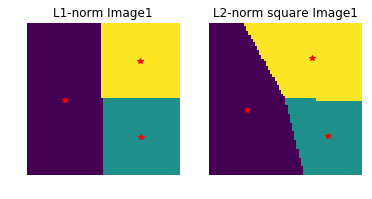

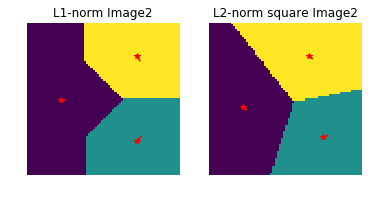

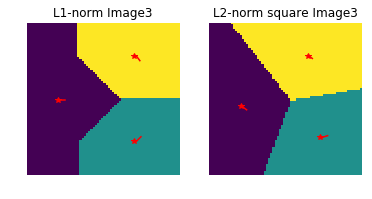

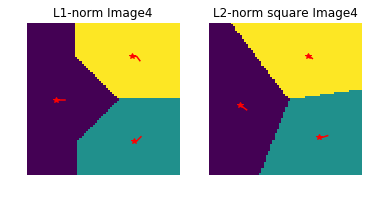

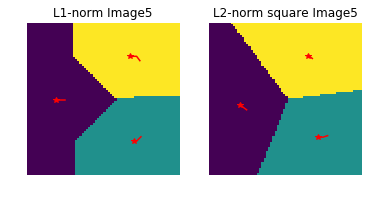

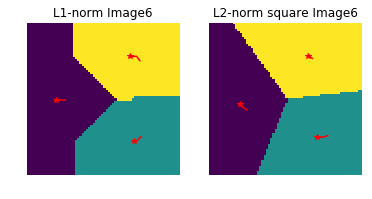

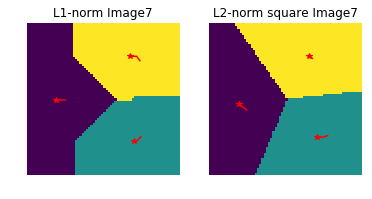

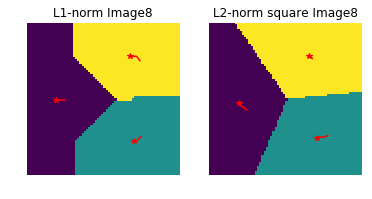

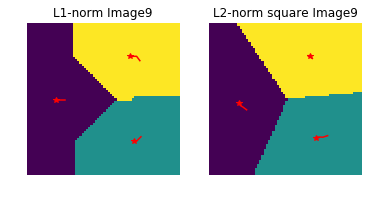

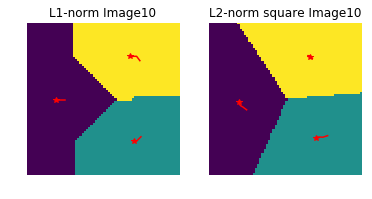

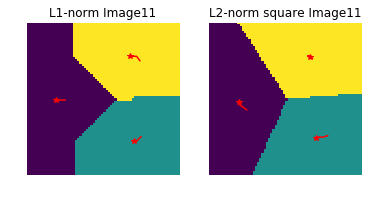

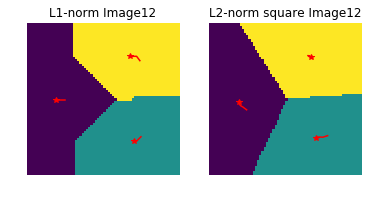

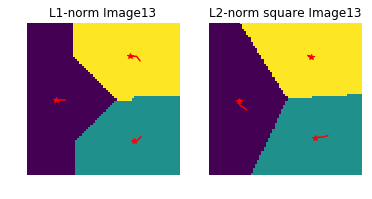

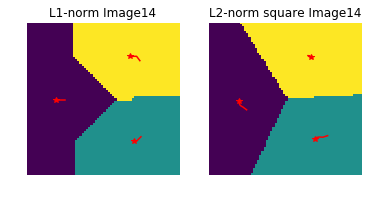

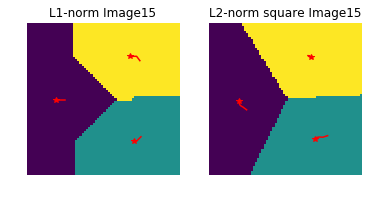

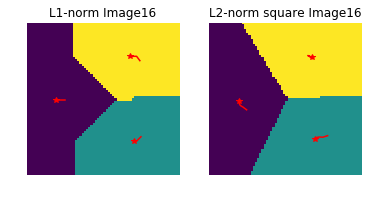

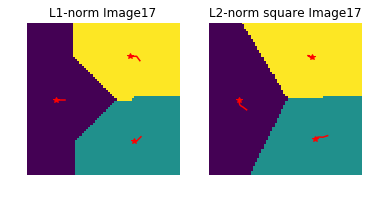

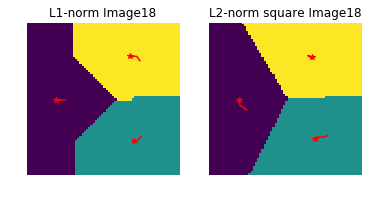

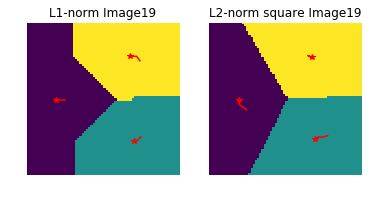

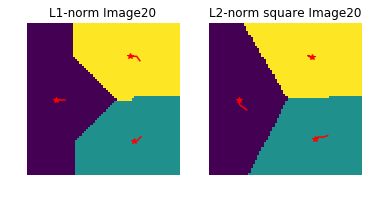

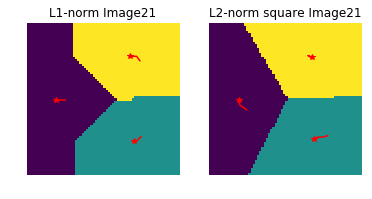

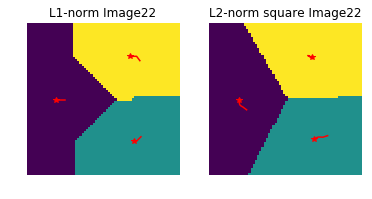

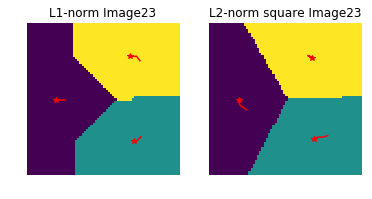

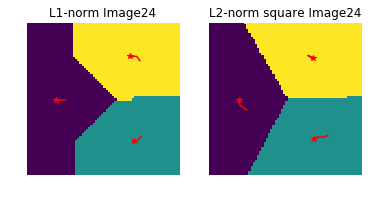

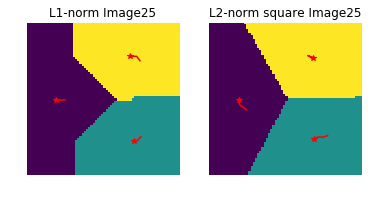

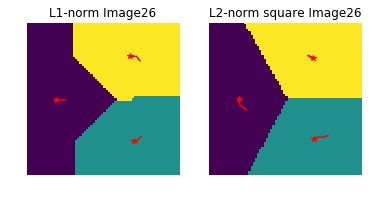

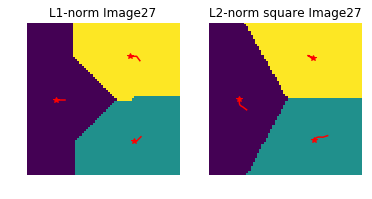

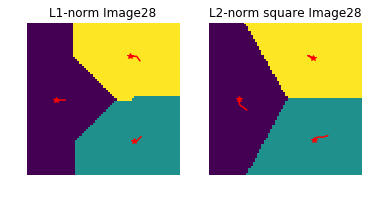

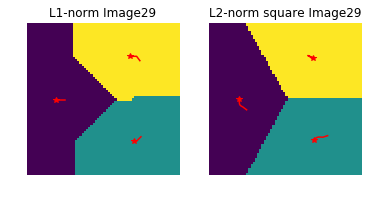

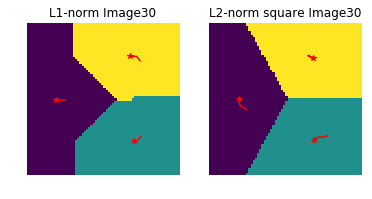

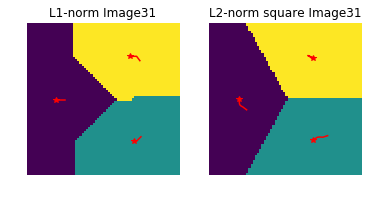

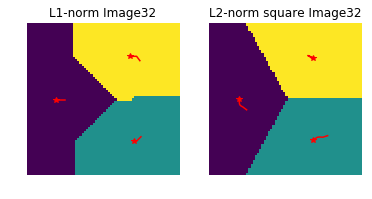

In [14]:
im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2,im_label1, im_label2 = initialCluster(3)
iter_num = iteration(3,im_average_x1, im_average_y1, im_count1, im_average_x2, im_average_y2, im_count2, im_label1, im_label2)

## Energy graphs

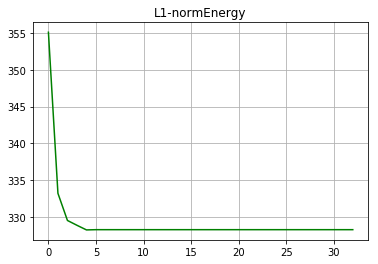

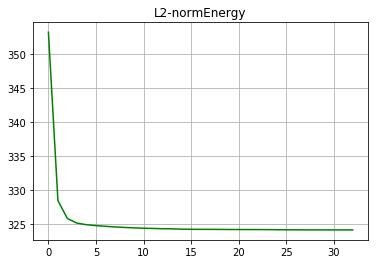

In [15]:
drawEnergy(iter_num, E1, "L1-norm")
drawEnergy(iter_num, E2, "L2-norm")

# K = 4

## Final average image

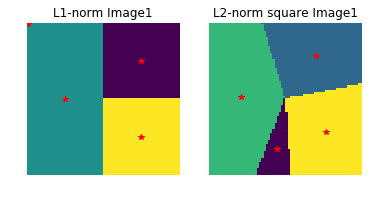

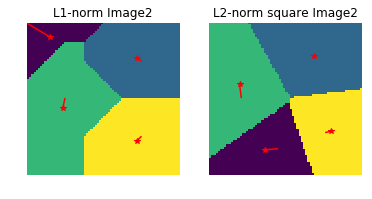

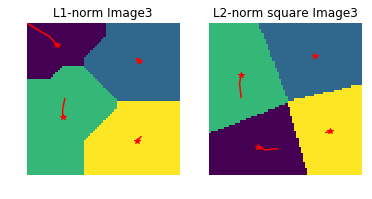

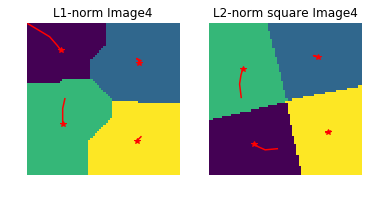

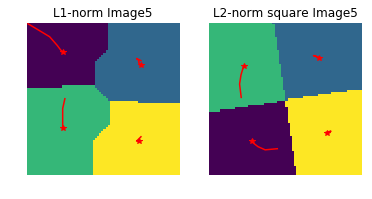

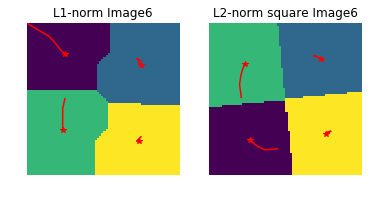

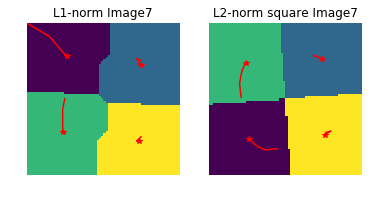

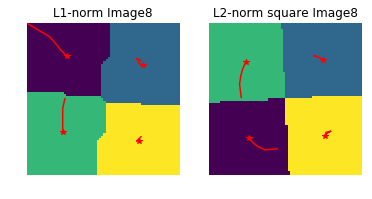

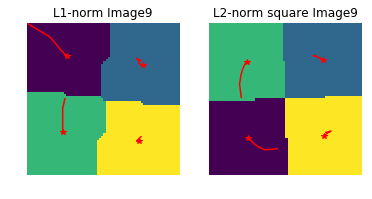

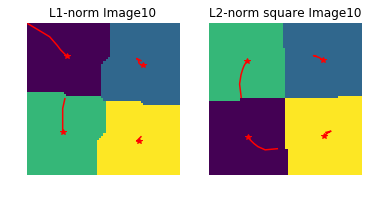

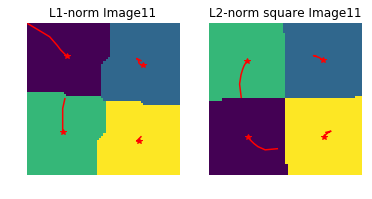

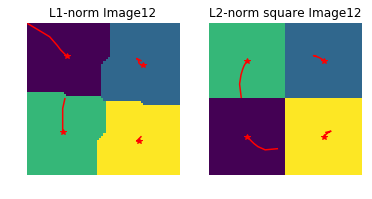

In [16]:
im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2,im_label1, im_label2 = initialCluster(4)
iter_num = iteration(4,im_average_x1, im_average_y1, im_count1, im_average_x2, im_average_y2, im_count2, im_label1, im_label2)

## Energy graphs

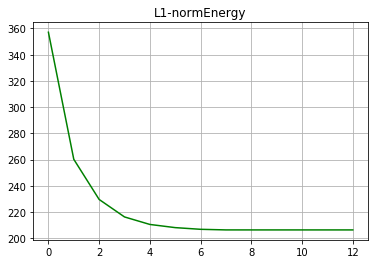

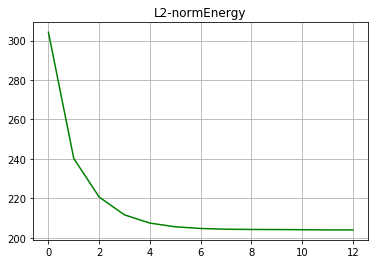

In [17]:
drawEnergy(iter_num, E1, "L1-norm")
drawEnergy(iter_num, E2, "L2-norm")

# K = 9

## Final average image

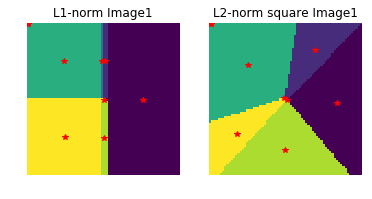

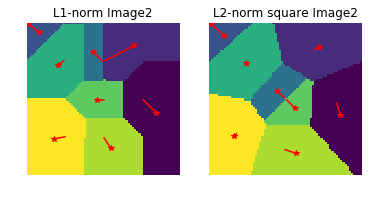

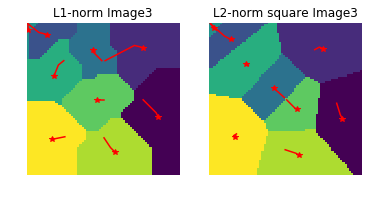

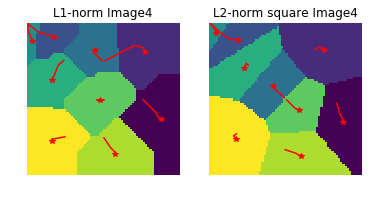

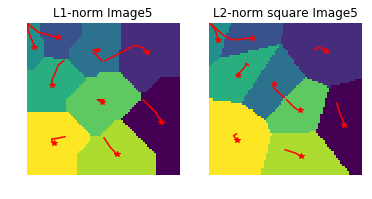

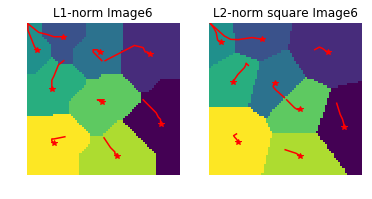

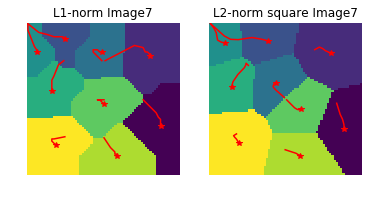

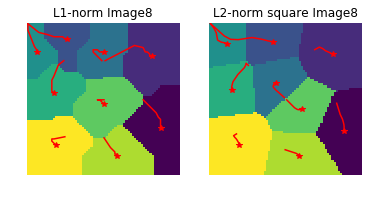

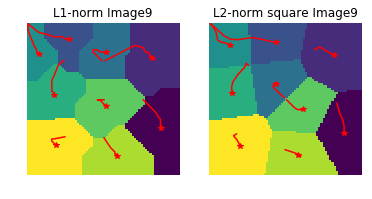

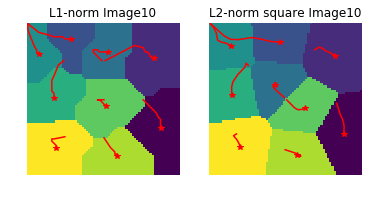

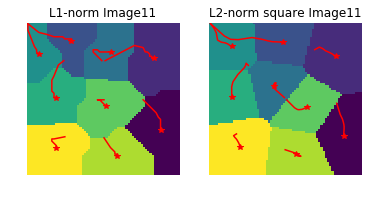

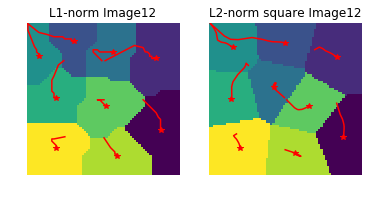

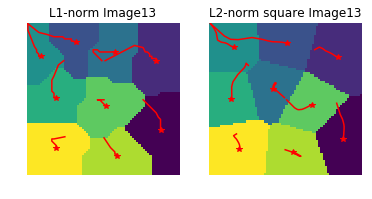

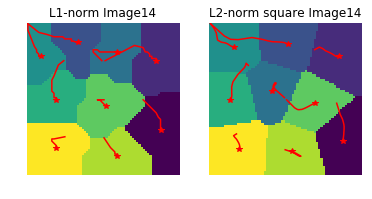

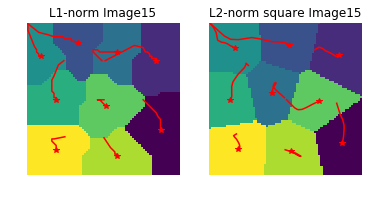

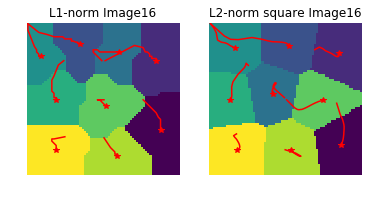

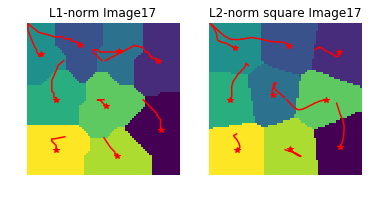

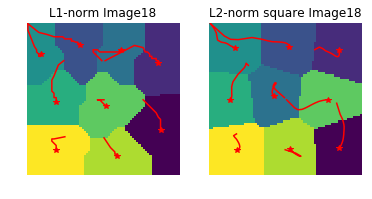

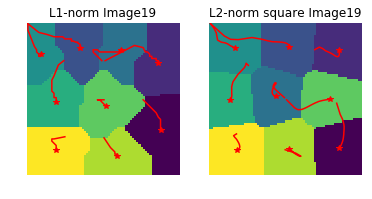

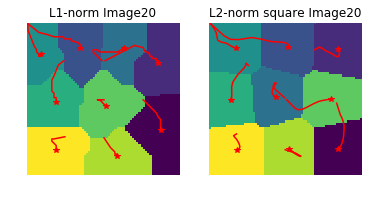

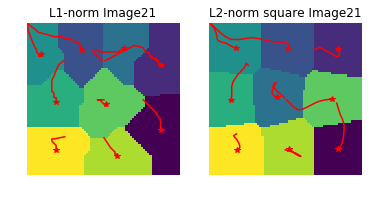

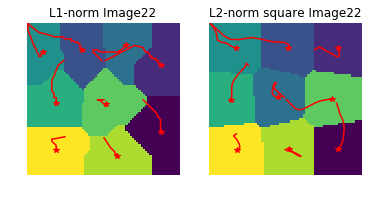

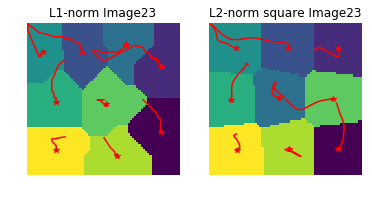

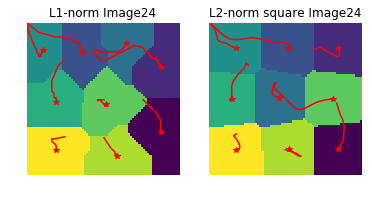

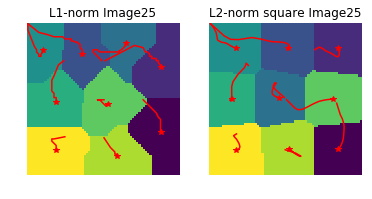

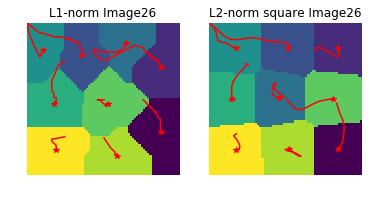

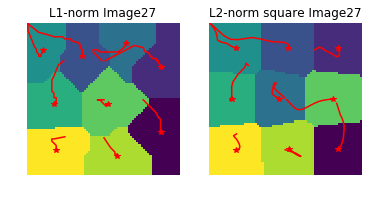

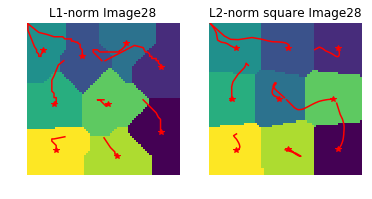

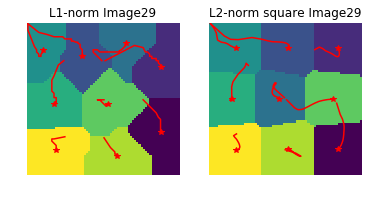

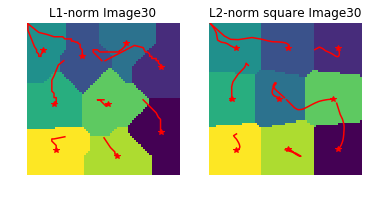

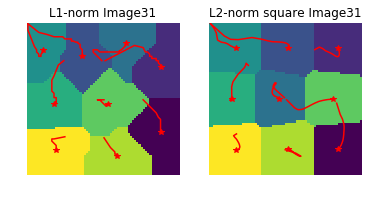

In [18]:
im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2,im_label1, im_label2 = initialCluster(9)
iter_num = iteration(9,im_average_x1, im_average_y1, im_count1, im_average_x2, im_average_y2, im_count2, im_label1, im_label2)

## Energy graphs

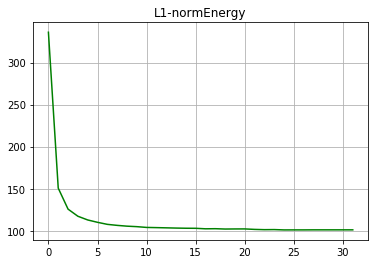

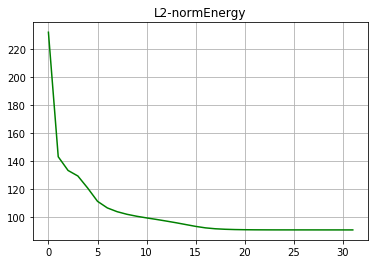

In [19]:
drawEnergy(iter_num, E1, "L1-norm")
drawEnergy(iter_num, E2, "L2-norm")

# K = 15

## Final average image

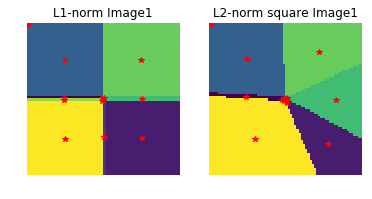

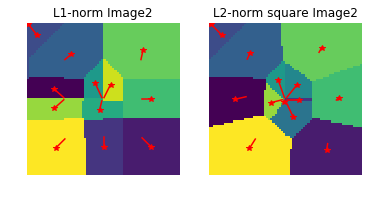

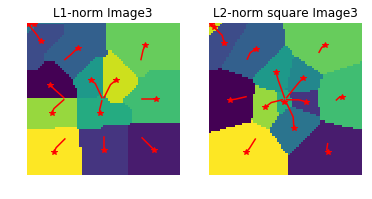

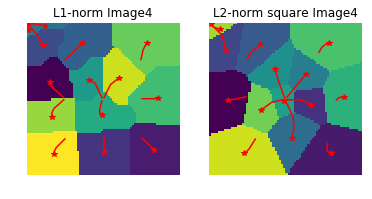

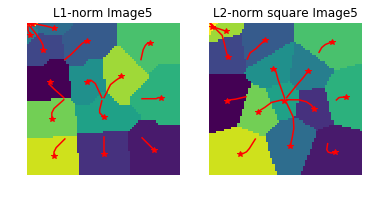

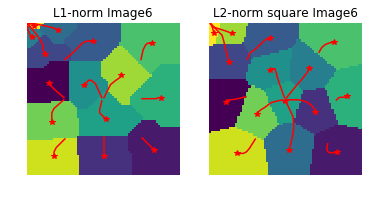

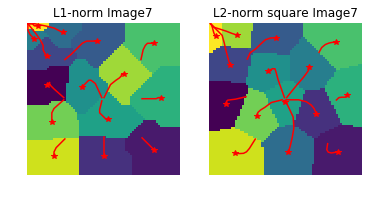

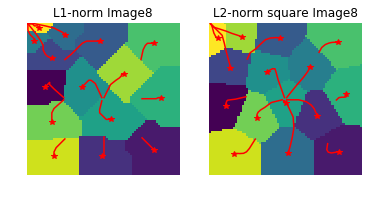

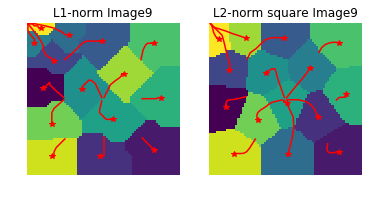

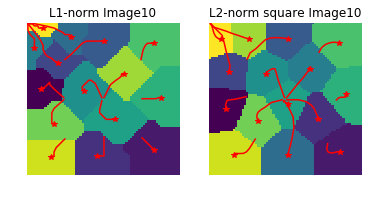

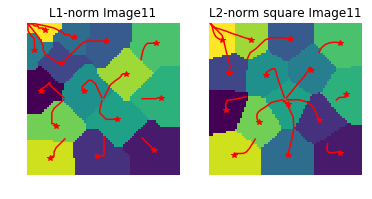

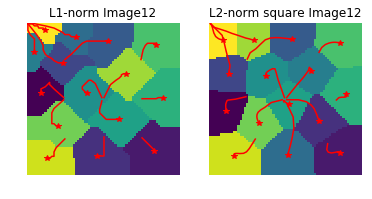

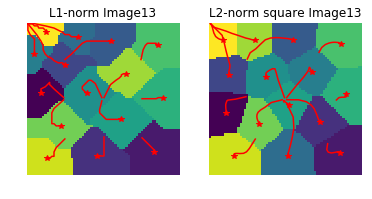

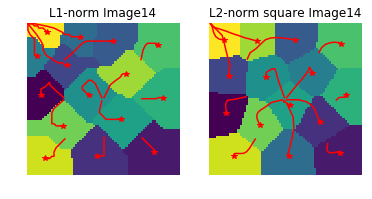

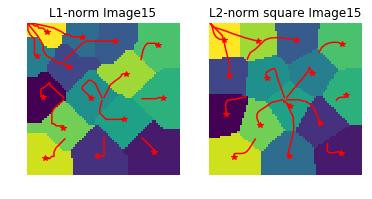

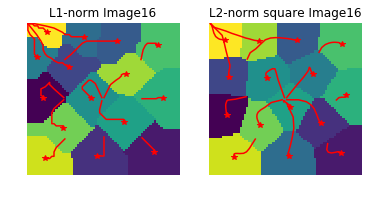

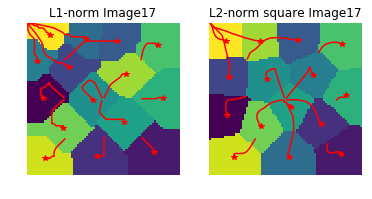

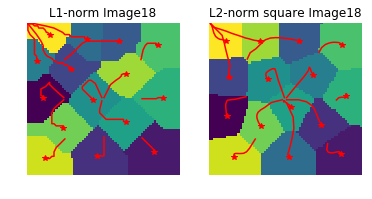

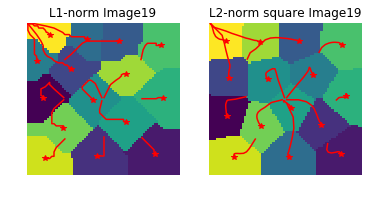

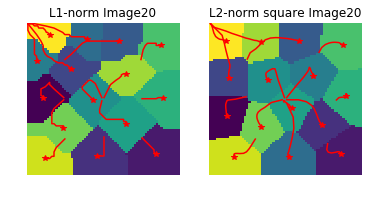

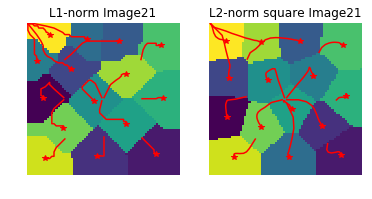

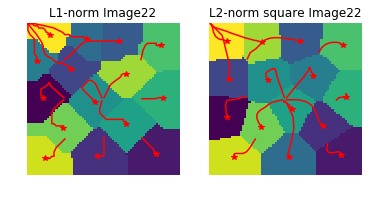

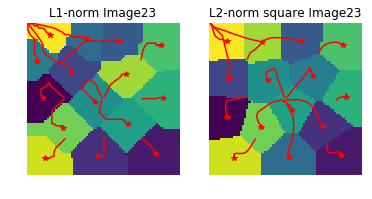

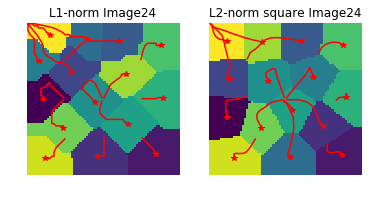

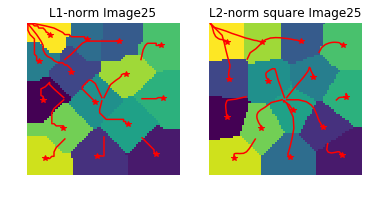

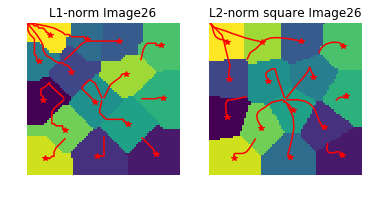

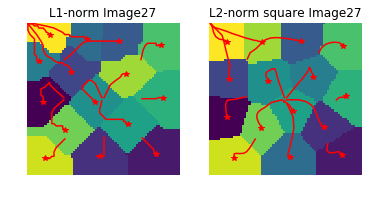

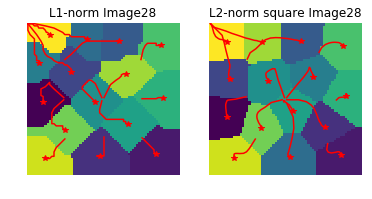

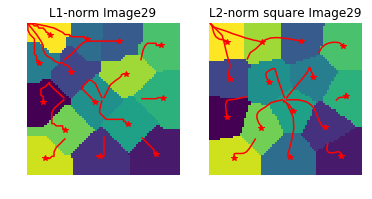

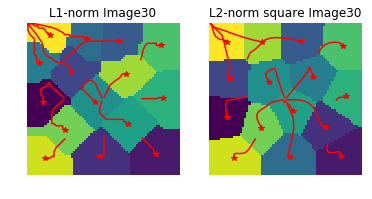

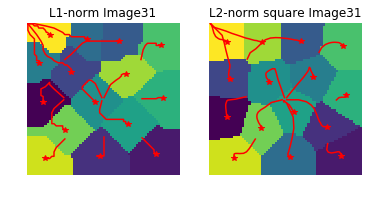

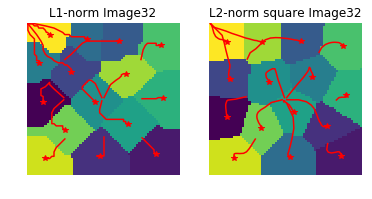

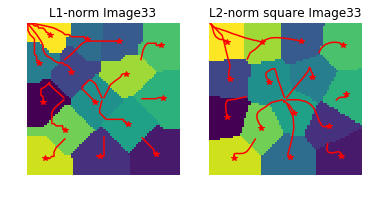

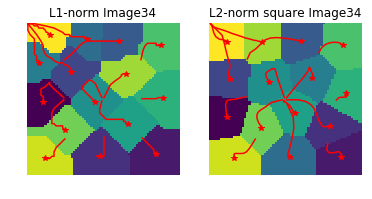

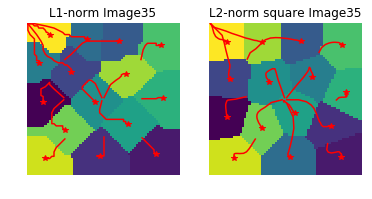

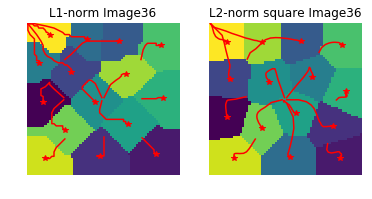

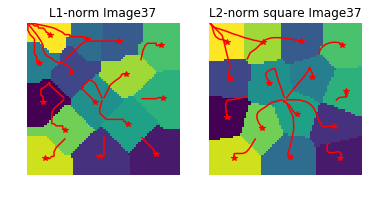

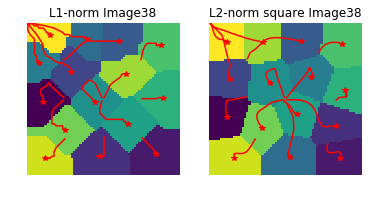

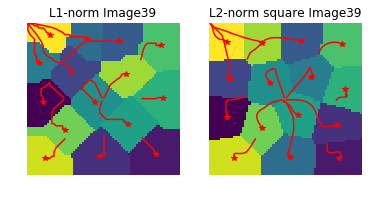

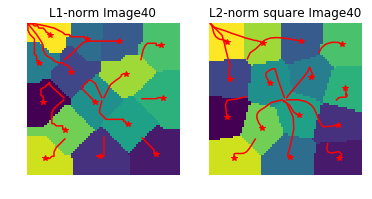

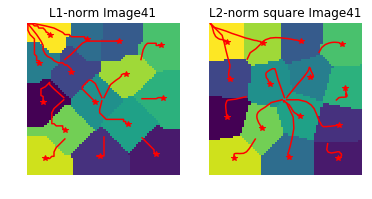

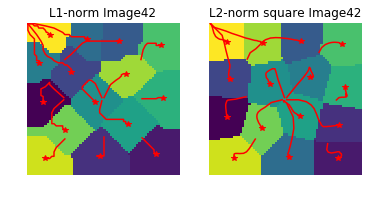

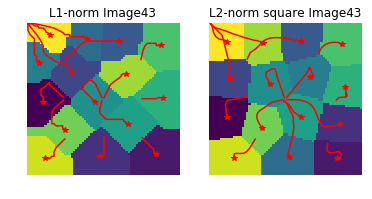

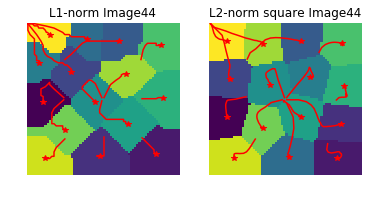

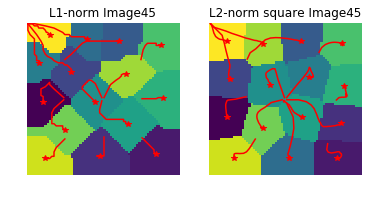

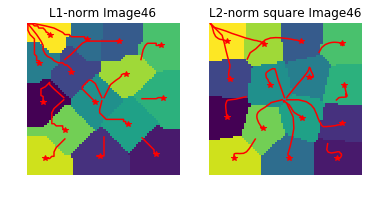

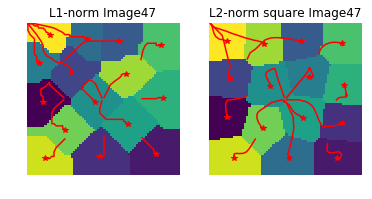

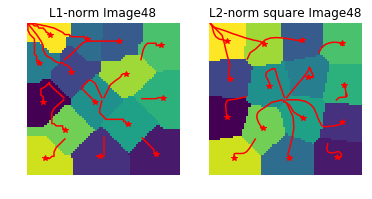

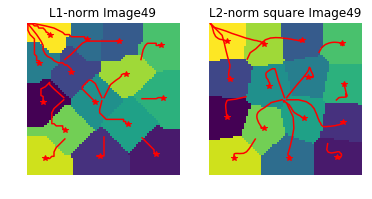

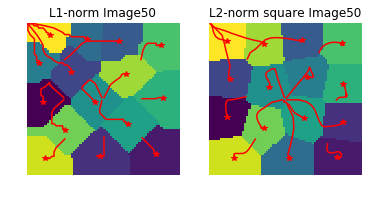

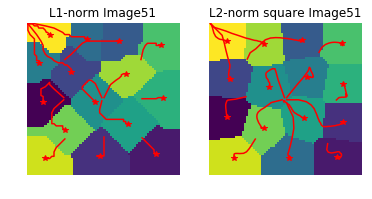

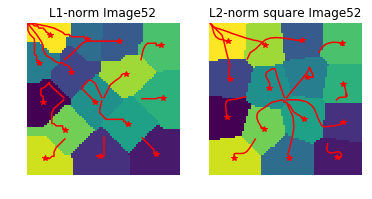

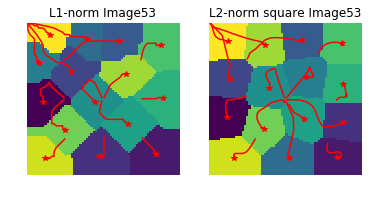

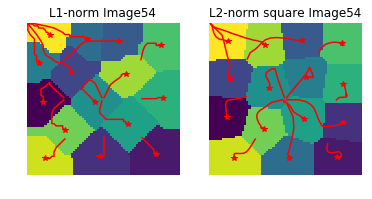

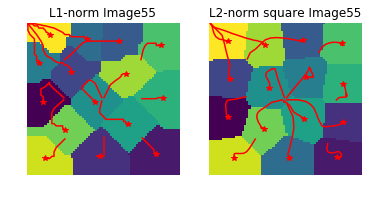

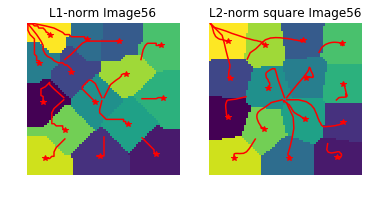

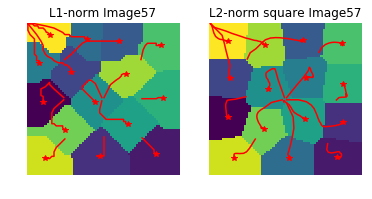

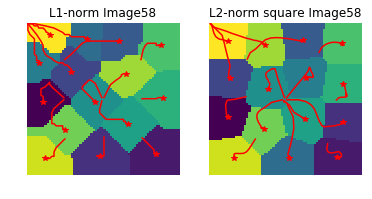

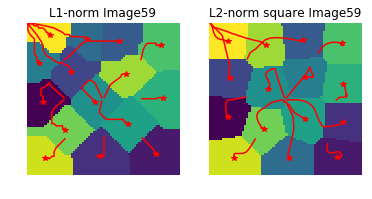

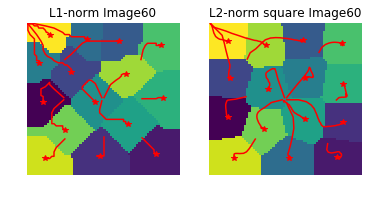

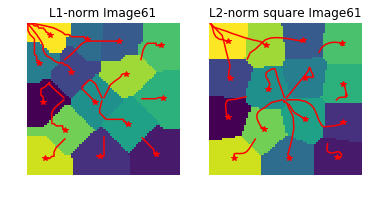

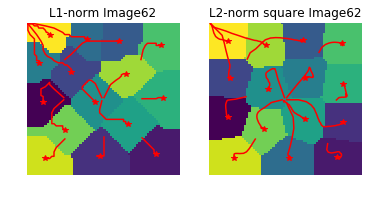

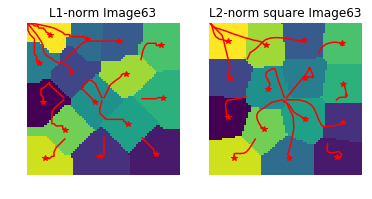

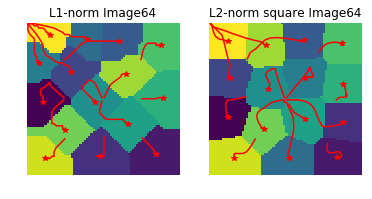

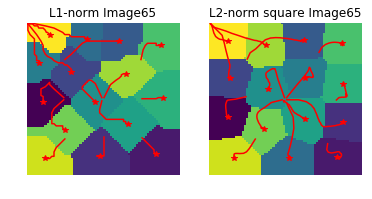

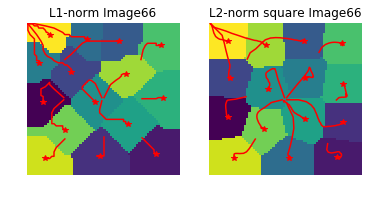

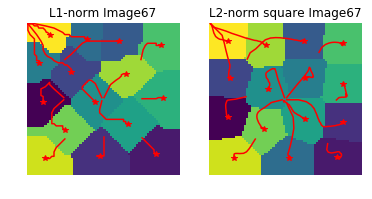

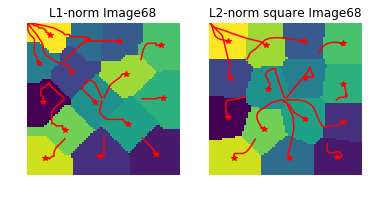

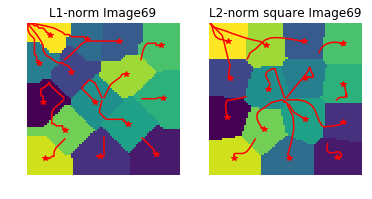

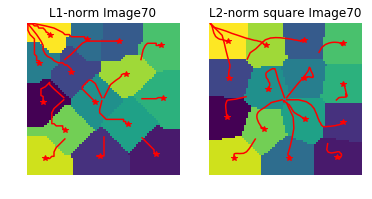

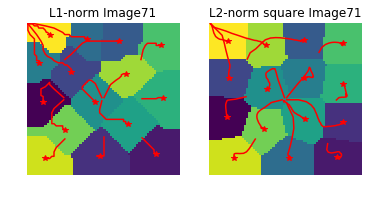

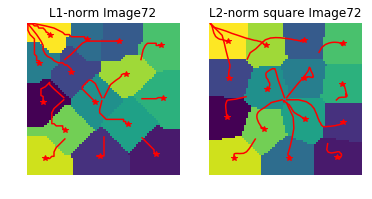

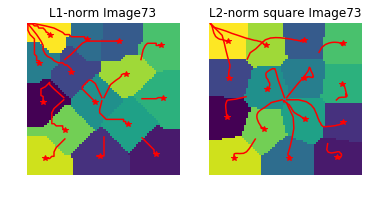

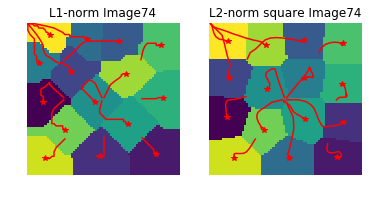

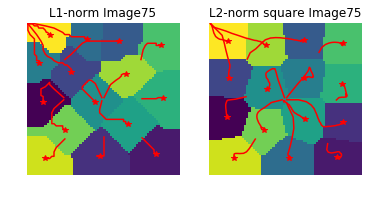

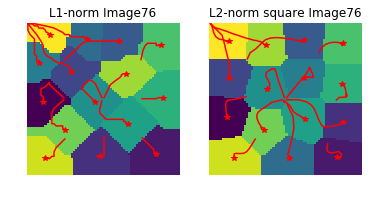

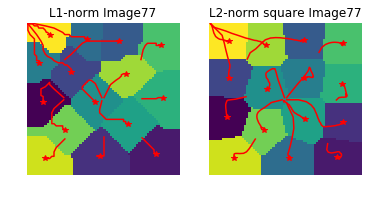

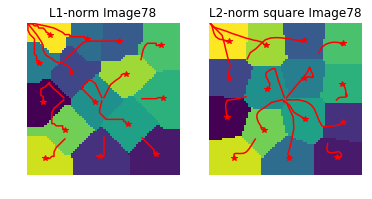

In [20]:
im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2,im_label1, im_label2 = initialCluster(15)
iter_num = iteration(15,im_average_x1, im_average_y1, im_count1, im_average_x2, im_average_y2, im_count2, im_label1, im_label2)

## Energy graphs

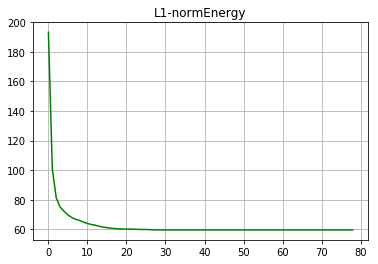

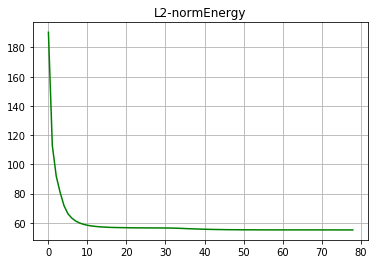

In [21]:
drawEnergy(iter_num, E1, "L1-norm")
drawEnergy(iter_num, E2, "L2-norm")

# K = 20

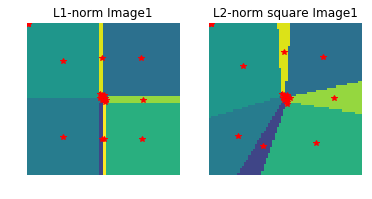

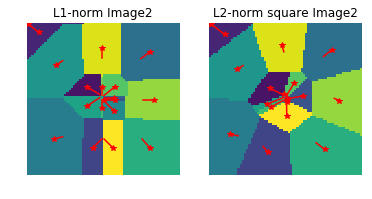

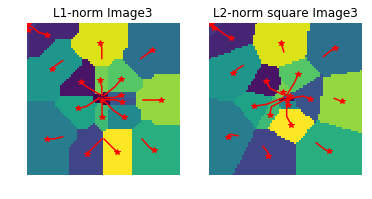

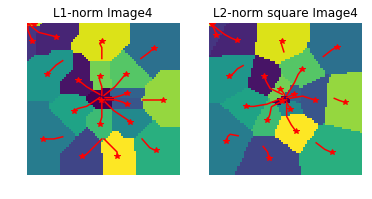

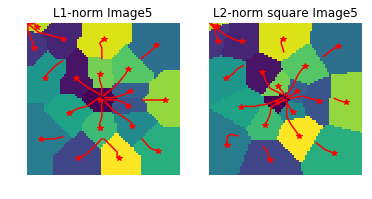

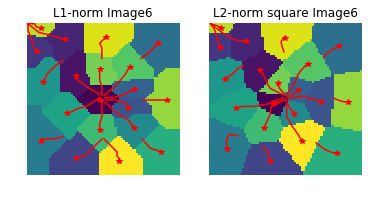

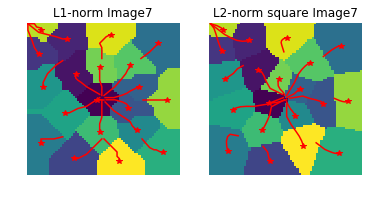

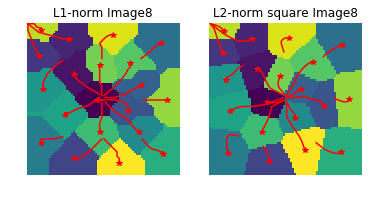

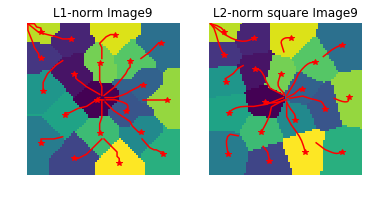

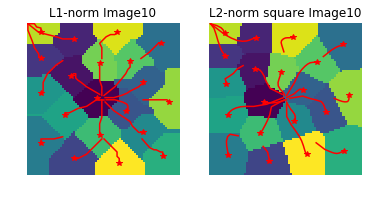

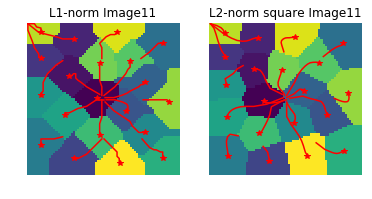

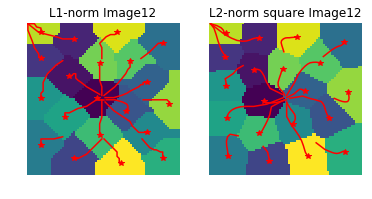

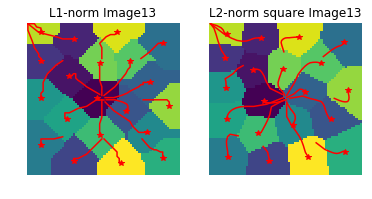

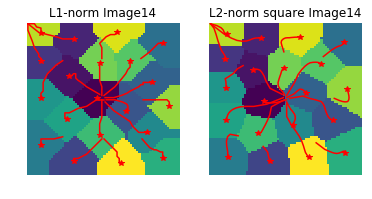

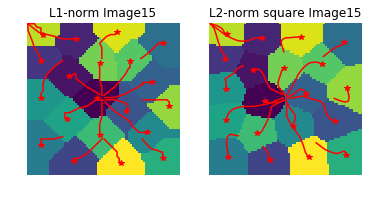

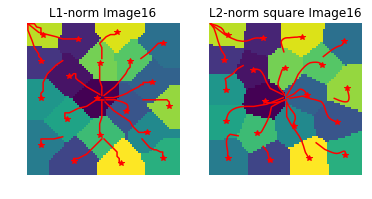

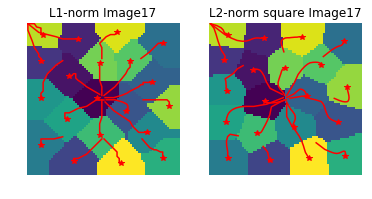

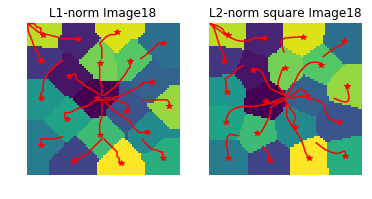

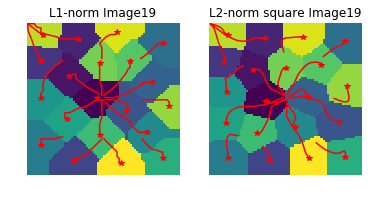

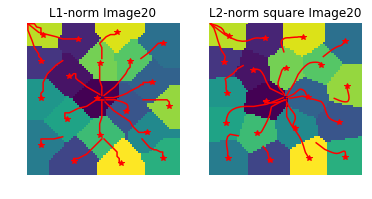

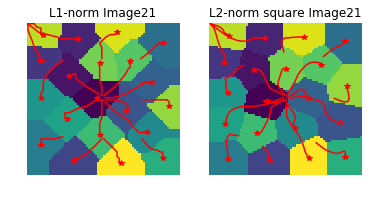

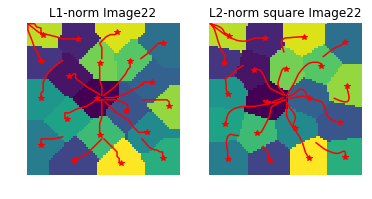

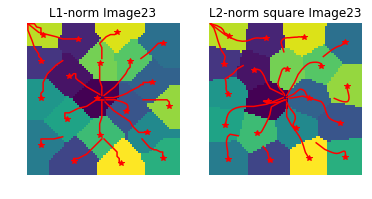

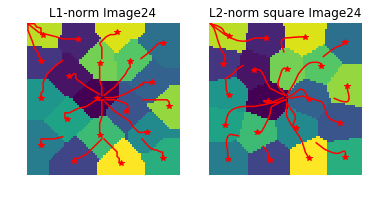

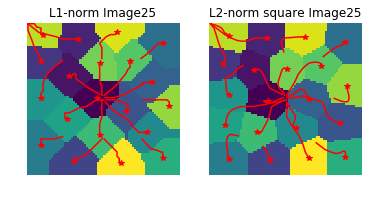

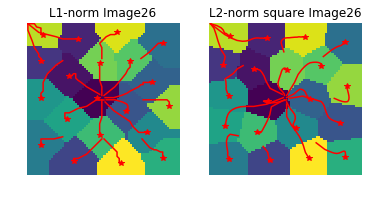

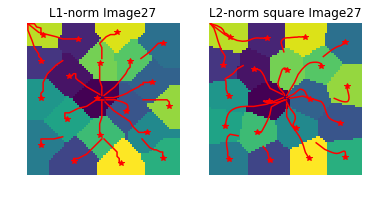

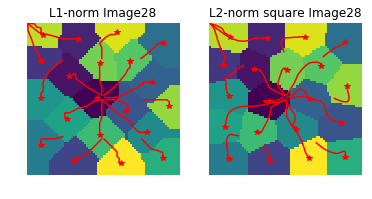

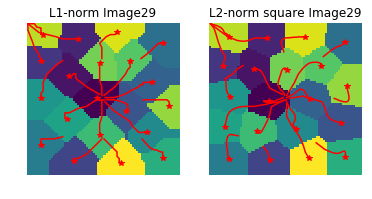

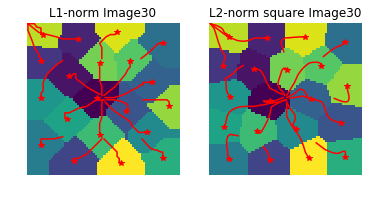

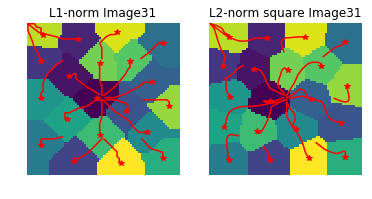

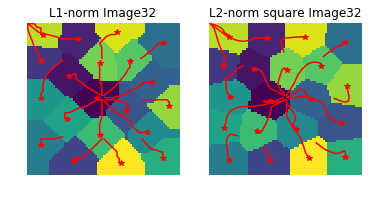

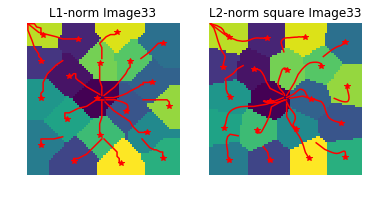

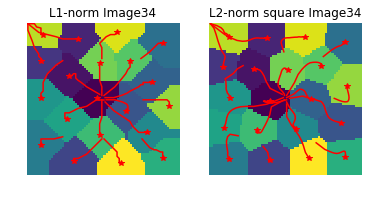

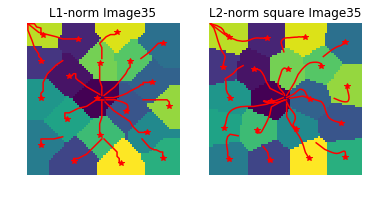

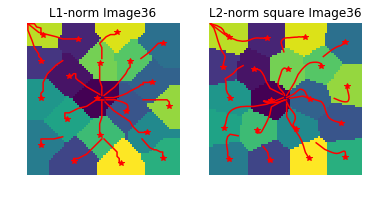

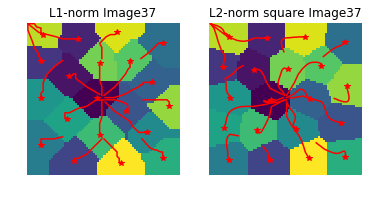

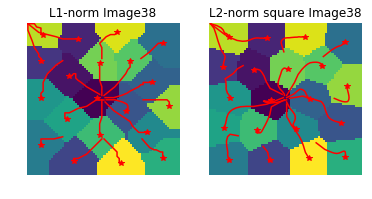

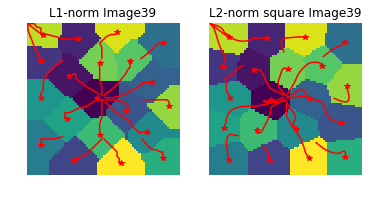

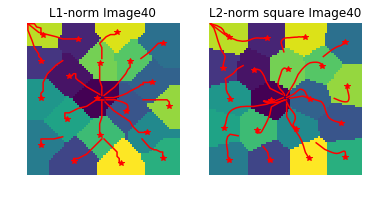

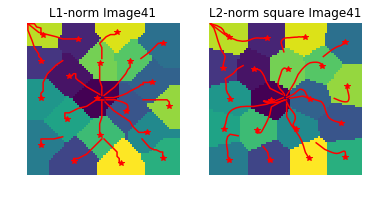

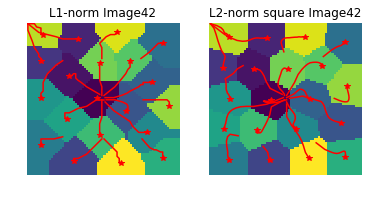

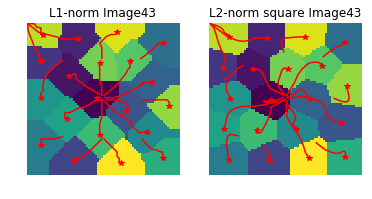

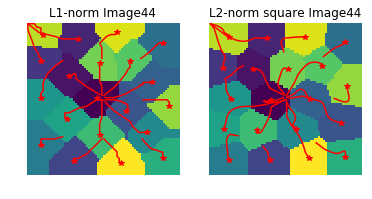

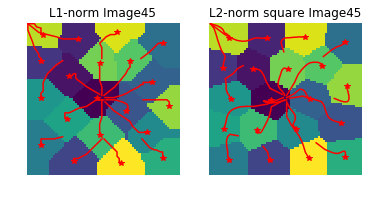

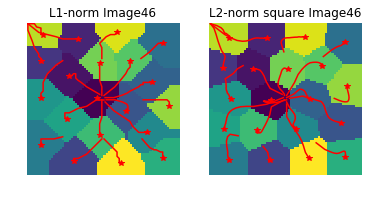

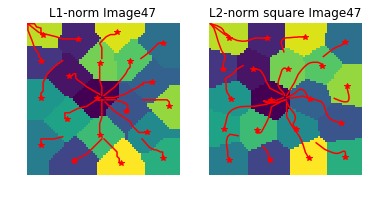

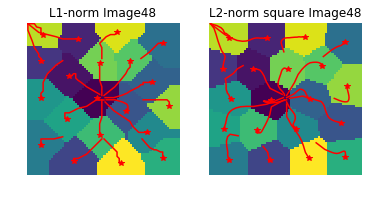

In [22]:
im_average_x1, im_average_y1, im_count1,im_average_x2, im_average_y2, im_count2,im_label1, im_label2 = initialCluster(20)
iter_num = iteration(20,im_average_x1, im_average_y1, im_count1, im_average_x2, im_average_y2, im_count2, im_label1, im_label2)

# Energy graph

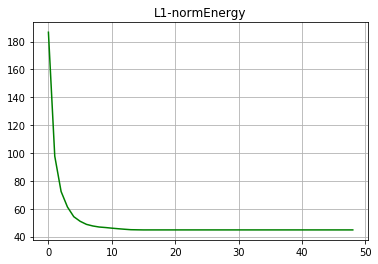

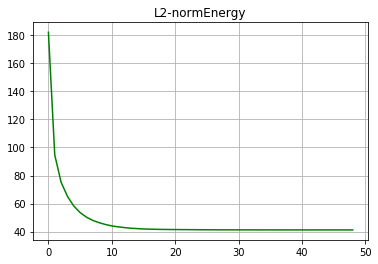

In [23]:
drawEnergy(iter_num, E1, "L1-norm")
drawEnergy(iter_num, E2, "L2-norm")